## <span style="color:#4375c7">DAI</span>
***
*Course materials are for educational purposes only. Nothing contained herein should be considered investment advice or an opinion regarding the suitability of any security. For more information about this course, please contact us.*
***
## 1. Deep Learning - Neural Networks <a name="NN"></a> 

**Deep learning** is a machine learning technique that uses **artificial neural networks (ANN)** with multiple **hidden layers** between the input and output layers of the network. The learning process can be supervised, unsupervised, or semi-supervised. Deep learning models are universal approximators and can be used as discriminative models (for regression and classification tasks) and as generative models (for simulation tasks).


During this course, we are using **[keras](https://keras.io/)** for the analysis. Keras is one of the most commonly used Python libraries when it comes to solving machine learning problems with deep neural networks.



### Session contents:
1. **[Deep Learning - Neural Networks ](#NN)**
    - [Motivation](#motiv)
    - [Feed forward networks](#FFNN)
    - [Backpropagation & gradient descent](#bp)
    - [Keras library](#keras)


    
2. **[Hands-on session](#ho)**
***

In [ ]:
!pip install -r https://raw.githubusercontent.com/firrm/DAI/main/requirements.txt #ensure that the required packages are installed
import numpy as np
import matplotlib.pyplot as plt
import math
import math as math


### Motivation <a id='motiv'></a>

We start with a basic visualization of a biological neuron, which passes an electronic signal from the dendrites (input) down the axon to the axon terminals (output). This signal is then passed on to another neuron. The neuron only passes the incoming signal if it is strong enough. That is, it must exceed a certain threshold. If the signal is weaker than the threshold, the neuron does not respond. [2].(The figure below is taken from https://simple.wikipedia.org/wiki/Neuron )* 

<br></br>
<img src="../assets/Neuron.png" alt="Drawing" style="width: 550px;"/>
<br/><br/>

Based on the biological observations, we want to motivate the artificial neural network. A basic artificial neuron can be seen as a form of an advanced linear model. For example, consider a linear regression 

$$\hat{y} = w[0] + w[1]*x[1]+ \dots + w[p]*x[p]$$

with weights $w$ and inputs $x$ and passing of the output to an **activation function** $f$, which transforms the output of the linear regression in a non-linear way considering a specific threshold like the biological counterpart. *(The figure below is taken from Nguyen/Zeigermann [3] )*  
$$output = f(\hat{y}) = f(w[0] + \sum_{i=1}^p w[i]*x[i]) $$

<br></br>
<img src="../assets/artificial_neuron.png" alt="Drawing" style="width: 550px;"/>
<br/><br/>

The first neural networks used the following simple **step function** with a threshold of zero
$$ f(n) =
  \begin{cases}
    0       & \quad \text{if } n < 0\\
    1  & \quad \text{if } n > 0
  \end{cases}
 $$
 
However, since we want to calculate the derivative of the activation function later during the learning process, we cannot use this simple step function because it is not differentiable.
We use a similar but differentiable function called the **sigmoid** function:

<function matplotlib.pyplot.show(close=None, block=None)>

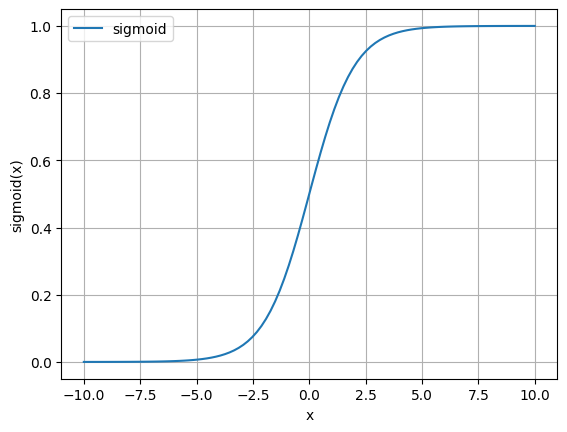

In [21]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))

line = np.linspace(-10, 10, 100)

plt.plot(line, sigmoid(line), label="sigmoid")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("sigmoid(x)")
plt.grid()
plt.show

A sigmoid function forces values into the [0, 1] interval, and its output can be interpreted as probabilities (see [3], [4]).
Keep in mind, however, that activation functions should be selected based on the specific task at hand.


### Feed forward networks <a id='FFNN'></a>
Combining layers of fully connected neurons leads us to **feed forward networks**, also called **multi layer perceptrons** (MLP).
These networks consist of an input layer of artificial neurons and hidden layers of artificial neurons that are fully connected to their input layer and fully connected to their output layer. All layers that are not input or output layers are called "hidden". The artificial neurons, or just neurons, are also called nodes. *(The figure below is taken from Nguyen/Zeigermann [3])* 
<br></br>
<img src="../assets/FFN.png" alt="Drawing" style="width: 350px;"/>
<br/><br/>
Each hidden layer neuron calculates the activation value for the weighted sum of the inputs. It then passes the output to the next neuron, and so on. This is why it is called "feed forward". This calculation can be done quite fast because it is a simple matrix calculation. The following example from [2] shows the calculation based on a two-layer feed forward network.
<br></br>
<img src="../assets/Matrix_Calculation2.png" alt="Drawing" style="width: 550px;"/>
<br/><br/>
This can be expressed by the following matrix calculation: 
<br></br>
<img src="../assets/Matrix_Calculation1.png" alt="Drawing" style="width: 550px;"/>
<br/><br/>


We only need to multiply the matrix of input values by the matrix of weights to get the summed weighted values for the neurons. This makes it computationally easy to propagate values through the network, even for very large networks with many layers and neurons. 

### Backpropagation & gradient descent <a id='bp'></a>
When we feed the signals through the network, we get an output from the output layer. With this output we start our learning algorithm. 

First, we compute the loss function between the output and the target, also called the error. But how can we use the error term to adjust the network weights? Let us look at this with an example.  *(The the example and figures below are taken from  Rashid [2] )* 
<br></br>
<img src="../assets/backprop.png" alt="Drawing" style="width: 750px;"/>
<br/><br/>

We split the error of each output to adjust every weight. 

For example, the fraction of error $e_1$ that adjusts the weight $w_{11}$ can be calculated as 

$$\frac{w_{11}}{w_{11}+w_{21}}, $$

the fraction of error $e_2$ that adjusts the weight $w_{21}$ can be calculated as

$$\frac{w_{21}}{w_{11}+w_{21}}, $$

But how can we calculate the weights when we have hidden layers? To deal with this, we need to calculate the error of the hidden neurons as

$$e_{hidden,1} =e_{output,1}*\frac{w_{11}}{w_{11}+w_{21}} + e_{output,2}*\frac{w_{21}}{w_{11}+w_{21}}$$

Start:
<br></br>
<img src="../assets/backprop3.png" alt="Drawing" style="width: 750px;"/>
<br/><br/>

End:
<br></br>
<img src="../assets/backprop2.png" alt="Drawing" style="width: 750px;"/>
<br/><br/>

At this point, we have backpropagated the error terms from the output to each neuron, but how do we actually adjust the weights? We use the gradient descent algorithm, which calculates the new weight by subtracting the gradient of the error term times the learning rate from the old weight.

$$w_{ij,new} = w_{ij,old}- learningrate   \nabla \frac{\delta e}{\delta w_{ij,old}}$$

We can visualize the idea of the gradient descent in the following plot taken from Rashid [2].
<br></br>
<img src="../assets/gradient.png" alt="Drawing" style="width: 750px;"/>
<br/><br/>

By adjusting the weight by the slope of the error term, we can "walk" down the error curve and get the specific weight for the lowest error. The step size depends on the slope and the learning rate. The learning rate is a hyperparameter that should be optimized during the training process. If the step size is too large, we might step over a minimum; if it is too small, we might get stuck on a local minimum. 

### Keras library <a id='nn'></a>
To model our first example of a neural network, we use the Python library **Keras**.
Keras is a high-level Application Programming Interface (API) developed by the Google engineer François Chollet, running on top of the machine learning platform **TensorFlow**. Tensorflow is an open-source machine learning platform developed by the Google Brain team. 

There are three ways to create models with the Keras library. 
First, there is the **Sequential** model, which is easy to implement but limited to single input and single output stacks of layers of the model. 
Second, there is the **Functional API**, which supports arbitrary architectures of models and is also easy to use. 
Third, there is the **Model subclassing**, which allows you to implement everything from scratch on your own. This is only recommended for very complex research use cases [1]. 

We will focus on the Functional API for simplicity and ease of use.

Keras or Tensorflow use multidimensional numpy arrays as basic data structure. These arrays are called **tensors**. A tensor is a container for data and can be described by its **dimension** (also called **axis** in terms of tensors).
A 0D tensor is also called a scalar and can only save one value, for example one float64 number.

In [22]:
x = np.array(0.63)

A **1D tensor** is also called a **vector** and consists of one axis like a vector in linear algebra.

In [23]:
x = np.array([0.63, 0.54, 0.89])

A **2D tensor**, or an array of vectors, is called a **matrix**.

In [24]:
x = np.array([[0.63, 0.54, 0.89],
              [0.12, 0.44, 0.23],
              [0.23, 0.34, 0.76]])

You can also create high-dimensional tensors like **3D tensors** for image or time series data and also **4D tensors** for video data. To manipulate these tensors, you can use the basic numpy transformations for arrays. You can always check the dimension and shape of the tensors by the .ndim and .shape attributes [4]. 

In [25]:
print(x.ndim)
print(x.shape)

2
(3, 3)


To transform tensors, use the numpy functions for arrays.

### Example: a neural network for regression <a id='nnR'></a>
Using our first neural network, we want to predict the median price of homes based on the **Boston Housing Price dataset**. We follow an example from Chollet [4].

First, we import the dataset and normalize the features.

In [31]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

2024-03-26 12:23:33.696856: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-26 12:23:33.701308: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-26 12:23:33.765291: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-26 12:23:36.684918: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step


We have 404 observations with 13 attributes of houses at different locations in the Boston suburb. For example, we have information on the per capita crime rate, the average number of rooms per dwelling, or the concentration of nitrogen oxides in the air. The target variables are the median values of the houses in thousands of dollars. Because the attributes are on different scales, we need to normalize the data.

In [32]:
# normalize the data if needed:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

print(train_data.shape)
print(test_data.shape)


(404, 13)
(102, 13)


We construct a neural network with one input layer, two hidden layers and 64 nodes. We use the **ReLu** function as the activation function in the input and hidden layers. The ReLu activation function is the most popular in deep learning because it zeroes out negative values and solves the problem of vanishing gradients during gradient propagation.

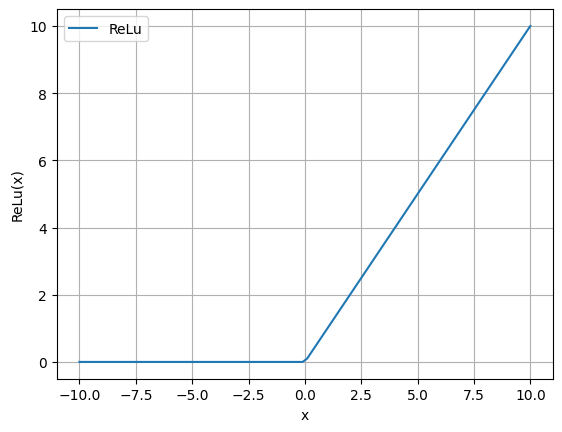

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import math
import math as math

def relu(input):
    'relu activation'
    # Calculate the value for the output of the relu function: output
    output = np.maximum(input, 0)
    # Return the value just calculated
    return(output)

line = np.linspace(-10, 10, 100)

plt.plot(line, relu(line), label="ReLu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("ReLu(x)")
plt.grid()

To specify which optimizer, loss function, or model metrics to use, we configure the learning process using the **compile()** function.
Since we want to predict the house price and run a regression, we use the **Mean Squared Error** (MSE) of our prediction and the target as our loss function or error. We use the **RMSProp** algorithm as the weight optimizer. This is an efficient and fast gradient descent algorithm. 

To monitor the training process, we use the **Mean Absolute Error** (MAE) metric as a common regression metric. For our house price prediction, an MAE of $1.5$ can be interpreted to mean that our predictions are off by $1500\$$ on average [4]. 

Using the summary() function of the keras model, we print a summary of our neural network, showing all layers and the number of neurons, as well as the number of parameters optimized during the training process.

In [34]:
from tensorflow.keras import layers,Model

#define the input space:
inputs = layers.Input((train_data.shape[1],))
# define the input layer:
x = layers.Dense(64, activation = 'relu')(inputs)
x = layers.Dense(64, activation = 'relu')(x)
output = layers.Dense(1)(x)
model = Model(inputs,output)
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model.summary()


2024-03-26 12:23:54.590920: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-26 12:23:54.591747: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 13)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_data, train_targets, validation_data=(test_data, test_targets), epochs=100, batch_size=8, verbose =0)

The epochs describe the number of backpropagation iterations through the data set. The batch (sometimes called a mini-batch) is the set of samples that are processed simultaneously by the model. We use only one data point at a time. Both are hyperparameters that can be optimized during training.

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(0, len(history.history['mae'])), history.history['mae'],label ="train")
plt.plot(range(0, len(history.history['val_mae'])),
         history.history['val_mae'],label="test")
plt.xlabel('Epochs')
plt.ylabel('Validation mae')
plt.axis([0, 100, 1, 3.5])
plt.legend()
plt.show()
print(history.history['val_mae'][-1])

As you can see, the MAE of the training and test data sets differ significantly. This indicates overfitting, as the train MAE seems to decrease significantly with higher epochs, while the test MAE seems to decrease much less. To mitigate this problem, we use a dropout layer.

A dropout layer is one of the most effective regularization techniques that randomly drops a number of output features of a layer during the training phase. The dropped output values are set to zero. The fraction of dropped values is called the dropout rate [4]. 

In [ ]:
##### define the input space:
inputs = layers.Input((train_data.shape[1],))
# define the input layer:
x = layers.Dense(64, activation = 'relu')(inputs)
x = layers.Dense(64, activation = 'relu')(x)
x = layers.Dropout(0.1)(x)
output = layers.Dense(1)(x)
model = Model(inputs,output)

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

history = model.fit(train_data, train_targets, validation_data=(test_data, test_targets), epochs=100, batch_size=8, verbose =0)
plt.plot(range(0, len(history.history['mae'])), history.history['mae'],label ="train")
plt.plot(range(0, len(history.history['val_mae'])),
         history.history['val_mae'],label="test")
plt.xlabel('Epochs')
plt.ylabel('Validation mae')
plt.axis([0, 100, 1.5, 3.5])
plt.legend()
plt.show()

According to this plot, the validation MAE stops improving significantly after 50 epochs. We can fit the final production model with 50 epochs to get the best result for our validation set.

In [ ]:
history = model.fit(train_data, train_targets, validation_data=(test_data, test_targets), epochs=50, batch_size=8, verbose =0)
print(history.history['mae'][-1])
print(history.history['val_mae'][-1])

A validation MAE of $2.42$ leads to a prediction error of $2420\$ $ on average. The network can be further optimized by choosing different network architectures, dropout rates, learning rates, or by using more training data. 

A common technique is to first overfit a network and then regularize the network to find the ideal model.

Now we want to summarize some rules for building a neural network following Chollet's tips [4]:

- Preprocess your data. For data with features with different ranges, scale each feature independently.

- Use a small network with one or two hidden layers when little data is available.

- For **regression** tasks, use a dense layer as the last layer without specifying the activation function. For **scalar regression**, use one neuron in the last layer, and for **multiple regression**, use multiple neurons, one for each equation. Use the mean squared error as the loss function.

- For **binary classification** tasks, use the **sigmoid** function in the last layer and **binary cross-entropy** as the loss function.

- For **multiclass classification**, use the **softmax** activation function with one neuron for each class you want to classify.  As a loss function, use **categorical cross-entropy**, since it minimizes the distance between the distributions of the prediction and the target.

- Use the **Adam** or **RMSProp** algorithm as an optimizer for fast and efficient training.
  
- Avoid overfitting by using appropriate network sizes, fewer epochs, and different training and test data sets.   
    

For a quick overview of the basic features of Keras, please check out: https://datacamp-community-prod.s3.amazonaws.com/94fc681d-5422-40cb-a129-2218e9522f17
To practice the Keras functions and learn more about neural networks, please take the datacamp course "Introduction to Deep Learning in Python".       

<br/><br/>

### Session takeaways 

*What have we learned in this session?*

- We know the basic structure of a neural network
- We know the training process of a neural network via backpropagation and gradient descent
- We know how to construct, train and evaluate a neural network for regression or classification tasks
- We can apply regularization to a network to reduce overfitting


*What's next?*

During the hands-on session, you will use Keras to build your own neural network and dive deeper into classification and regression tasks with deep learning models.
***

<br/><br/>

## 2. Hands-on session <a id='ho'></a>

### Exercise 1
Challenge: 
1. Using the Boston housing price dataset, build a neural network regression model. 
2. First overfit the model and then optimize the various hyperparameters. 
3. What is the smallest MAE? 

***


### Exercise 2 

 ***
1. Load the fraud detection dataset and split the data into a training and a test dataset.
2. Create a neural network with Keras for binary classification. Use accuracy as a metric.
3. Compute the confusion matrix with a threshold of 0.5 (use the predict() function of keras.model)

### References
***
[1] Keras online documentation: https://keras.io/about/

[2] Rashid, T. (2017). Neuronale Netze selbst programmieren: ein verständlicher Einstieg mit Python. O'Reilly.

[3] Nguyen, C. N., & Zeigermann, O. (2018). Machine Learning: kurz & gut.

[4] Chollet, F. (2018). Deep Learning mit Python und Keras: Das Praxis-Handbuch vom Entwickler der Keras-Bibliothek. MITP-Verlags GmbH & Co. KG.

